In [1]:
import charts_function_list
import os

In [2]:
_,data,outputs = charts_function_list.folder_setup()
os.chdir(data)
lil = pd.read_csv('lil.csv')

In [6]:
#drop rappers with no value
lil_with_height =lil.dropna().reset_index(drop=True)

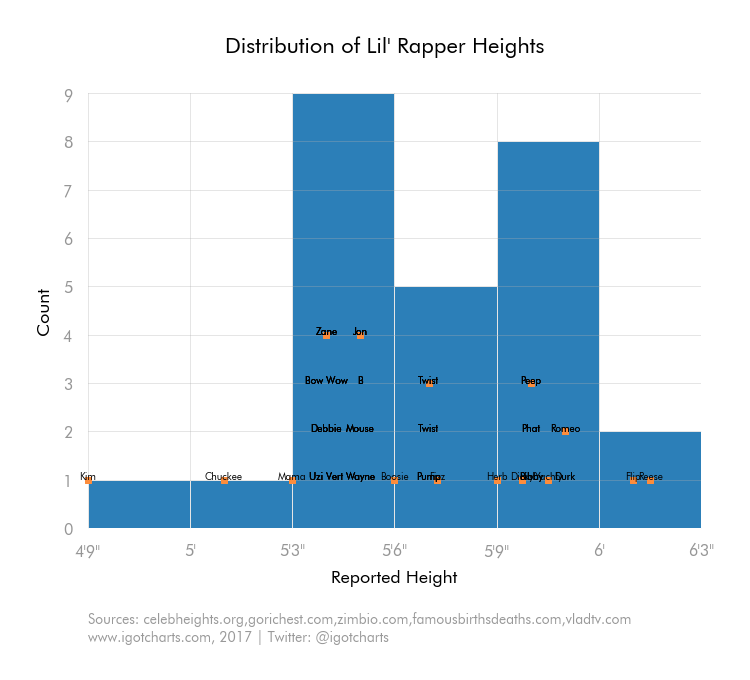

In [188]:
plt.rcParams["font.family"] = 'Futura Bk BT'
lil_hist = charts_function_list.chart_maker()
fig = lil_hist.initial_fig_axis()
fig.suptitle('Distribution of Lil\' Rapper Heights', size=22)
ax = lil_hist.axes_set_up(fig)
hist = plt.hist(lil_with_height['Total Inches'],bins=[57+3*x for x in range(7)],color='#2c7fb8',edgecolor='white',zorder=1,clip_on=False)
height_count = lil_with_height['Total Inches'].value_counts().sort_index()

plt.scatter(height_count.index,height_count.values,zorder=2,color='#fd8d3c',clip_on=False,marker='s')

lil_hist.tick_params_(ax,pad=15)
lil_hist.x_axis_setup(ax,min_=57,max_=75)
lil_hist.y_axis_setup(ax,min_=0,max_=9)
ax.set_xticks([57+(3*x) for x in range(7)])
ax.set_xticklabels(['4\'9"','5\'','5\'3"','5\'6"','5\'9"','6\'','6\'3"'])
ax.grid(alpha=.4)
ax.set_ylabel('Count',size=18)
ax.set_xlabel('Reported Height',size=18)

#set as multi index for labels
multi = lil_with_height.set_index(['Total Inches','Name'])

for item in multi.index.get_level_values(0):
    for i,v in enumerate(multi.iloc[multi.index.get_level_values(0)==item].reset_index()['Name']):
        ax.text(item,i+1,v,ha='center')
        
lil_hist.citations(ax,source_y=-.22,chart_tag_y=-.26,
                   source='Sources: celebheights.org,gorichest.com,zimbio.com,famousbirthsdeaths.com,vladtv.com')
plt.show()